# "50 startups."

### _"Predict which companies to invest for maximizing profit" (Regression task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains data about 50 startups. It has 7 columns: “ID”, “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Category”  “Profit”.

    
**Метаданные:**
    
* **ID** - startup ID

* **R&D Spend** - how much each startup spends on Research and Development

* **Administration** - how much they spend on Administration cost

* **Marketing Spend** - how much they spend on Marketing

* **State** - which state the startup is based in

* **Category** - which business category the startup belong to

* **Profit** - the profit made by the startup
   

### Questions:
    

* #### Predict which companies to invest for maximizing profit (choose model with the best score; create predictions; choose companies)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head
* ### Observation of target variable (describe + visualisation:distplot)
* ### Numerical and Categorical features
    * #### List of Numerical and Categorical features
* ### Missing Data
    * #### List of data features with missing values  
    * #### Filling missing values
* ### Numerical and Categorical features    
    * #### Visualisation  of Numerical and categorical features (regplot + barplot)

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### One-Hot Encoding 
* ### Standard Scaler (optional)
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### ML Models (Linear regression, Gradient Boosting Regression)
* ### Build, train, evaluate and visualise models
* ### Creating final predictions with Test set
* ### Model comparison


## [Conclusion](#Conclusion.)
* ### Submission of ‘.csv’ file with predictions

## Part 1: Import, Load Data.

* ### Import 

In [113]:
# import standard libraries
# pkg install py38-scikit-learn
# pkg install py38-joblib
# pkg install py38-splot
# pkg install py38-... all of below (see freebsd seaborn freshports)
import numpy as np 
print ('numpy: {}'.format(np.__version__))
import pandas as pd 
print ('pandas: {}'.format(pd.__version__))
import seaborn as sns
print ('seaborn: {}'.format(sns.__version__))
import matplotlib.pyplot as plt
import matplotlib
print ('matplotlib: {}'.format(matplotlib.__version__))
import pylab as pl
from scipy import stats
import sklearn
print ('sklearn: {}'.format(sklearn.__version__))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# import models and metrics
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


numpy: 1.22.3
pandas: 1.3.5
seaborn: 0.11.0
matplotlib: 3.4.3
sklearn: 1.0.2


* ### Load Data

In [114]:
# read data from '.csv' files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_raw=test

# identify target
target = train['Profit']


## Part 2: Exploratory Data Analysis.

* ### Info

In [115]:
# print the full summary of the Train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  47 non-null     float64
 4   State            50 non-null     object 
 5   Category         49 non-null     object 
 6   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [116]:
# print the full summary of the Test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   48 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            49 non-null     object 
 5   Category         50 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ KB


* ### Head

In [117]:
# preview of the first 5 lines of the loaded Train data 
train.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category,Profit
0,0,165349.20,136897.80,471784.10,New York,Industrials,192261.83
1,1,162597.70,151377.59,443898.53,California,Technology,191792.06
2,2,153441.51,101145.55,407934.54,Florida,Healthcare,191050.39
3,3,144372.41,118671.85,383199.62,New York,Financials,182901.99
4,4,142107.34,91391.77,366168.42,Florida,Industrials,166187.94


In [118]:
# preview of the first 5 lines of the loaded Test data 
test.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category
0,0,165349.20,136897.80,471784.10,New York,Industrials
1,1,162597.70,151377.59,443898.53,California,Technology
2,2,153441.51,101145.55,407934.54,Florida,Healthcare
3,3,144372.41,118671.85,383199.62,New York,Financials
4,4,142107.34,91391.77,366168.42,Florida,Industrials


* ### Observation of target variable

In [119]:
# target variable
train['Profit'].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Profit', ylabel='Count'>

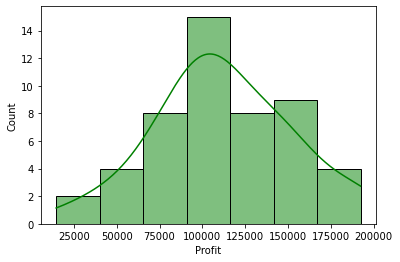

In [120]:
# visualisation of 'Profit' distribution
#sns.displot(train['Profit'], color='g', kde=True)
sns.histplot(train['Profit'], color='g', kde=True)

In [121]:
# set 'ID' to index; drop ID from analise
train = train.set_index('ID')
test = test.set_index('ID')


* ### Numerical and Categorical features
#### List of Numerical and Categorical features

In [ ]:
# check for Numerical and Categorical features in Train
numerical_feats_train = train.dtypes[train.dtypes != 'object'].index
print ('Quantity of Numerical features: ', len(numerical_feats_train))
print ()
print (train[numerical_feats_train].columns)
print ()
categorical_feats_train = train.dtypes[train.dtypes == 'object'].index
print ('Quantity of Categorical features: ', len(categorical_feats_train))
print ()
print (train[categorical_feats_train].columns)

* ### Missing values

#### List of data features with missing values

In [ ]:
# check the Train features with missing values 
nan_columns = [i for i in train.columns if train[i].isnull().any()]
print(train.isnull().sum())
print()
print("There are " + str(len(nan_columns)) +" columns with NAN values for 50 rows.")
nan_columns


In [ ]:
# check the Test features with missing values
nan_columns = [i for i in test.columns if test[i].isnull().any()]
print(test.isnull().sum())
print()
print("There are " + str(len(nan_columns)) +" columns with NAN values for 50 rows.")
nan_columns

#### Filling missing values

Fields where NAN values have meaning.

Explaining in further depth:

* 'R&D Spend': Numerical - replacement of NAN by 'mean';
* 'Administration': Numerical - replacement of NAN by 'mean';
* 'Marketing Spend': Numerical - replacement of NAN by 'mean';
* 'State': Categorical - replacement of NAN by 'None';
* 'Category': Categorical - replacement of NAN by 'None'.

In [ ]:
 # Numerical NAN columns to fill in Train and Test datasets
nan_columns_fill = [
    'R&D Spend',
    'Administration',
    'Marketing Spend'
    ]

# replace 'NAN' with 'mean' in these columns
train.fillna(train.mean(), inplace = True)  
test.fillna(test.mean(), inplace = True)


# Categorical NAN columns to fill in Train and Test datasets
non_columns_fill = [
    'State', 
    'Category'
    ]

# replace 'NAN' with 'None' in these columns
for col in non_columns_fill:
    train[col].fillna('None', inplace=True)
    test[col].fillna('None', inplace=True)

In [ ]:
# check is there any mising values left in Train
train.isnull().sum().sum()

In [ ]:
# check is there any mising values left in Test
test.isnull().sum().sum()

#### Visualisation  of Numerical features (regplot)

In [ ]:
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

num_feats = list(numerical_feats_train)
not_plot = ['Id',  'Profit']
plot_num_feats = [c for c in list(numerical_feats_train) if c not in not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols + c
        if i < len(plot_num_feats):
            sns.regplot(train[plot_num_feats[i]], train['Profit'], ax = axs[r][c], color = "#5081ac" )
            stp = stats.pearsonr(train[plot_num_feats[i]], train['Profit'])
          
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)



plt.tight_layout()    
plt.show()


In [ ]:
# categorical features visualisation
# 'Profit' split in 'State' level
sns.barplot(x = 'State', y = 'Profit', data = train, palette = "Blues_d")

In [ ]:
# categorical features visualisation
# 'Profit' split in 'Category' level
sns.barplot(x = 'Category', y = 'Profit', data = train, palette = "Blues_d")
plt.xticks(rotation=90)

## Part 3: Data Wrangling and Transformation.

* ### One-Hot Encoding

In [ ]:
# One-Hot Encoding Train dataset
train = pd.get_dummies(train,columns=['State', 'Category'])

# Drop target variable 
train = train.drop(columns=['Profit'])



In [ ]:
# preview of the first 5 lines of the loaded Train data 
train.head()

In [ ]:
# Train data shape
train.shape

In [ ]:
# One Hot-Encoding Test dataset
test = pd.get_dummies(test,columns=['State', 'Category'])

In [ ]:
# preview of the first 5 lines of the loaded Test data 
test.head()

In [ ]:
# Test data shape
test.shape

In [ ]:
# Drop unnecessary variables 
train = train.drop(columns=['Category_None'])
test = test.drop(columns=['State_None'])

* ### StandardScaler

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc_train = sc.fit_transform(train)
#sc_test = sc.transform(test)

In [ ]:
#sc_train = pd.DataFrame(sc_train)
#sc_train.head()

In [ ]:
#sc_test = pd.DataFrame(sc_test)
#sc_test.head()

* ### Creating datasets for ML part

In [ ]:
# set 'X' for features of scaled Train dataset 'sc_train'
#X = sc_train

# set 'y' for the target 'Profit'
#y = target

# 'X_Test' for features of scaled Test dataset 'sc_test'
#X_Test = sc_test

In [ ]:
# set 'X' for features of scaled Train dataset 'train'
X = train

# set 'y' for the target 'Profit'
y = target

# 'X_Test' for features of scaled Test dataset 'test'
X_Test = test

* ### 'Train\Test' split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split on train and validation 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

## Part 4: Machine Learning.

* ### Build, train, evaluate and visualise models

* #### Linear Regression

In [ ]:
# Linear Regression model
LR = LinearRegression()

# Model Training
LR.fit(X_train,y_train)

# Model Prediction
LR_pred = LR.predict(X_test)
LR_pred

In [ ]:
# Model R2 score
LRscore = LR.score(X_test, y_test)
LRscore

In [ ]:
# Model Metrics
LRMetrics = pd.DataFrame({'Model': 'Linear Regression',
                          'r2score':r2_score(y_test,LR_pred),
                          'MAE': metrics.mean_absolute_error (y_test,LR_pred),
                          'MSE': metrics.mean_squared_error(y_test,LR_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,LR_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,LR_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,LR_pred))             
                          },index=[1])

LRMetrics

In [ ]:
# visualisation of Train dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y_test, LR_pred,'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [ ]:
# Test final predictions
LR_pred1 = LR.predict(X_Test)
LR_pred1  


In [ ]:
# Model Metrics
LRMetrics1 = pd.DataFrame({'Model': 'Linear Regression',
                           'r2score':r2_score(y,LR_pred1),
                           'MAE': metrics.mean_absolute_error (y,LR_pred1),
                           'MSE': metrics.mean_squared_error(y,LR_pred1),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y,LR_pred1)),
                           'MSLE': metrics.mean_squared_log_error(y,LR_pred1),
                           'RMSLE':np.sqrt(metrics.mean_squared_log_error(y,LR_pred1))             
                           },index=[1])

LRMetrics1

In [ ]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y, LR_pred1,'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()


In [ ]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actualvspredicted = pd.DataFrame({"Actual Profit":y,"LR Predicted Profit":LR_pred1 })
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

* #### Gradient Boosting Regressor

In [ ]:
# Gradient Boosting Regressor model
GB=GradientBoostingRegressor(random_state=0)

# Model Training
GB.fit(X_train,y_train)

# Model Prediction
GB_pred = GB.predict(X_test)

# Model R2 score
GBscore =GB.score(X_test, y_test)


In [ ]:
# Model Metrics
GBMetrics = pd.DataFrame({'Model': 'Gradient Boosting Regressor',
                          'r2score':r2_score(y_test,GB_pred),
                          'MAE': metrics.mean_absolute_error (y_test,GB_pred),
                          'MSE': metrics.mean_squared_error(y_test,GB_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,GB_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,GB_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,GB_pred))             
                          },index=[2])

GBMetrics

In [ ]:
# Test final predictions
GB_pred1 = GB.predict(X_Test)
GB_pred1

In [ ]:
# Model Metrics
GBMetrics1 = pd.DataFrame({'Model': 'GradientBoostingRegressor',
                           'r2score':r2_score(y,GB_pred1),
                           'MAE': metrics.mean_absolute_error (y,GB_pred1),
                           'MSE': metrics.mean_squared_error(y,GB_pred1),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y,GB_pred1)),
                           'MSLE': metrics.mean_squared_log_error(y,GB_pred1),
                           'RMSLE':np.sqrt(metrics.mean_squared_log_error(y,GB_pred1))             
                          },index=[1])

GBMetrics1

In [ ]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y, GB_pred1,'ro')
pl.plot([0,200000],[0,200000], 'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

### Model comparison

In [ ]:
# score comparison of models
frames = [LRMetrics1,GBMetrics1]
TrainingResult = pd.concat(frames)
TrainingResult

In [ ]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actualvspredicted = pd.DataFrame({"Actual Profit":y,"LR Predicted Profit":LR_pred1, "GB Predicted Profit":GB_pred1})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

**Result**: The best model is **Gradient Boosting Regressor** with **R2 score = 0.972002**.

##  Conclusion.

In [ ]:
# submission of .csv file with final predictions

sub = pd.DataFrame()
sub= test_raw
sub['ID'] = test.index
sub['Profit'] = GB_pred1
sub.to_csv('StartupPredictionsAll.csv', index=False)